In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [116]:
# importing the data
olympics = pd.read_csv('olympics_dataset.csv')
olympics.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


# Explore the dataset

In [117]:
olympics.shape

(252565, 11)

In [118]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [119]:
olympics.describe(include='all')

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
count,2.525650e+05,252565,252565,252565,252565,252565.000000,252565,252565,252565,252565,252565
unique,NaN,129992,2,1193,234,NaN,1,23,76,1041,4
top,NaN,John Jr.,M,United States,USA,NaN,Summer,Tokyo,Athletics,Football Men's Football,No medal
freq,NaN,76,178544,16236,16774,NaN,252565,22823,43294,5733,213747
mean,2.305499e+05,NaN,NaN,NaN,NaN,1981.743908,NaN,NaN,NaN,NaN,NaN
std,4.289330e+05,NaN,NaN,NaN,NaN,32.596548,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,5.713700e+04,NaN,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,1.356110e+05,NaN,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,2.118590e+05,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN


In [120]:
# Looking for null values
olympics.isnull().sum()

,0
player_id,0
Name,0
Sex,0
Team,0
NOC,0
Year,0
Season,0
City,0
Sport,0
Event,0


Based on the dataset, we have verified that there are no missing values in any of the columns.

In [121]:
olympics.columns

Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')

In [122]:
# Creating a new dataframe with unique athletes for each year so we will be able to visualize gender, sports and teams distributions.
olympics_unique = olympics.drop_duplicates(subset= ['Name', 'Year'])
olympics_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180860 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  180860 non-null  int64 
 1   Name       180860 non-null  object
 2   Sex        180860 non-null  object
 3   Team       180860 non-null  object
 4   NOC        180860 non-null  object
 5   Year       180860 non-null  int64 
 6   Season     180860 non-null  object
 7   City       180860 non-null  object
 8   Sport      180860 non-null  object
 9   Event      180860 non-null  object
 10  Medal      180860 non-null  object
dtypes: int64(2), object(9)
memory usage: 16.6+ MB


In [123]:
# Grouping the data by Year and Sex to count the number of athletes
olympics_count = olympics_unique.groupby(['Year', 'Sex']).size().unstack()

In [124]:
olympics_count.head()

Sex,F,M
Year,,
1896,NaN,176.0
1900,23.0,1192.0
1904,6.0,636.0
1906,6.0,832.0
1908,44.0,1964.0


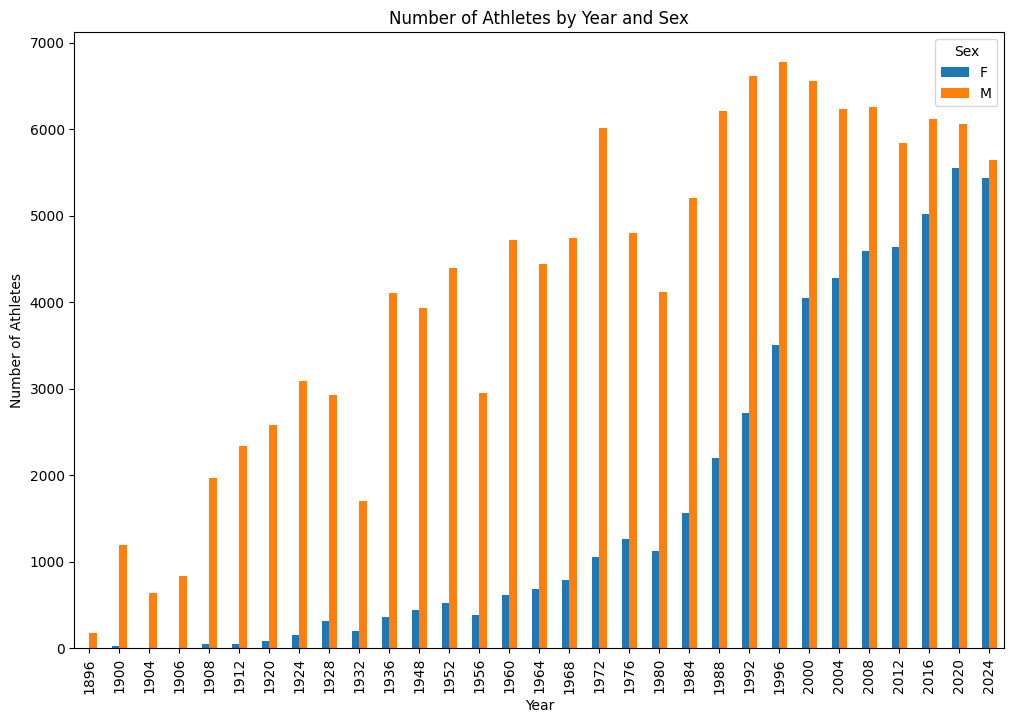

In [125]:
# Plotting the bar chart
olympics_count.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Athletes by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()

# Increase of Participant


*   The data reveals a steady increase in the total number of athletes over time, highlighting the Olympics' growing global appeal and the expanding participation of countries worldwide.


# Gender Representation


*   In the early Olympic Games (1896-1920), male athletes vastly outnumbered female athletes, as women’s participation was minimal. However, from the 1970s and 1980s onward, female participation grew significantly, driven by societal movements advocating for gender equality and the introduction of more women's events in the Olympics. By the 2000s, the representation of male and female athletes had become much more balanced, reflecting progress toward gender equity.


# Post-World War II Growth


*   From 1948 onwards, following World War II, the number of athletes increased substantially, likely driven by the resurgence of international events and the inclusion of more nations in the Olympics.


# Modern Era (2000s and Beyond)


*   In the 21st century, male and female athlete representation has become nearly equal, showcasing the International Olympic Committee’s (IOC) efforts to promote gender equality in sports.













In [126]:
# Grouping by Year abd countig the uniaue number of countries
country_count = olympics_unique.groupby('Year')['Team'].nunique()

In [127]:
country_count.values

array([ 13, 132,  46,  47,  70,  84,  64,  68,  67,  59, 105, 111, 133,
       122, 186, 168, 112, 139,  92,  80, 140, 170, 207, 241, 239, 253,
       249, 239, 246, 206, 206])

TypeError: 'bool' object is not callable

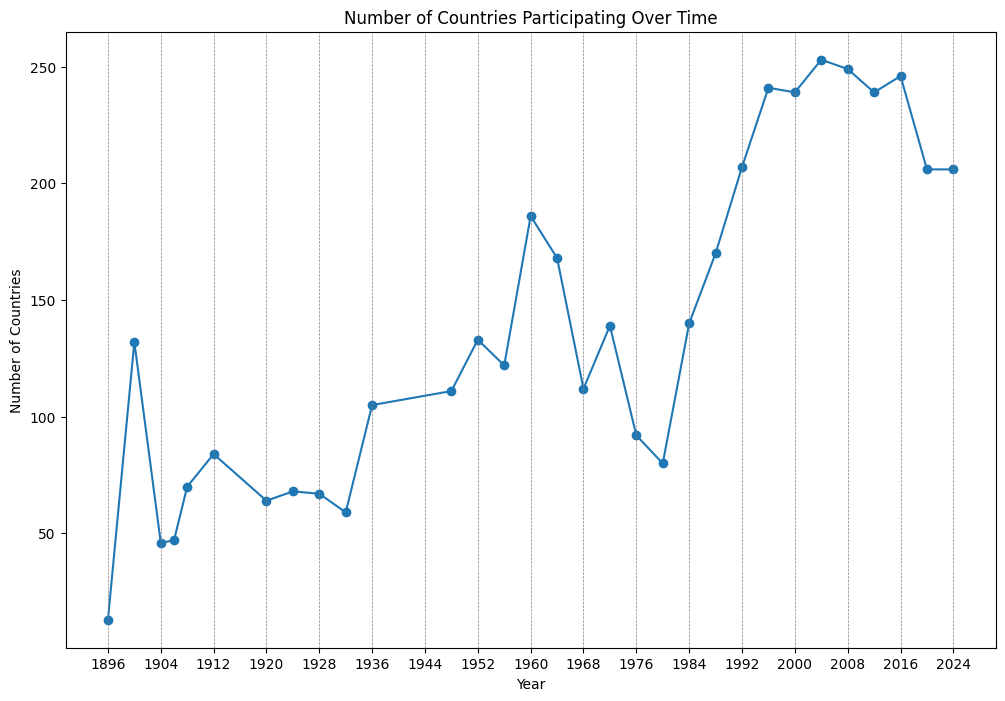

In [128]:
# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(country_count.index, country_count.values, marker='o')

for year in range(int(country_count.index.min()), int(country_count.index.max()) + 1, 8):
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=0.5)

plt.xticks(range(int(country_count.index.min()), int(country_count.index.max()) + 1, 8))

plt.title('Number of Countries Participating Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

# Overall Growth


*   The Olympics have seen a consistent upward trend in the
number of participating countries, highlighting the Games' growing global reach and inclusivity.


# Early Fluctuations


*   Between 1896 and 1920, participation fluctuated due to logistical challenges and limited global awareness of the Olympics. The sharp decline around 1904 may have resulted from geopolitical issues or significant travel difficulties.



# Post-World War Growth


*   Starting in 1948, after World War II, participation steadily increased as the world recovered and international events like the Olympics regained prominence.



# Cold War Era


*   The 1960s and 1980s saw declines linked to political tensions during the Cold War. Key events include the boycotts of the 1980 Moscow Games and the 1984 Los Angeles Games, which significantly impacted participation.




# Modern Era:


*   From the 1990s onward, the Olympics experienced record-high participation, driven by the inclusion of newly independent nations after the Soviet Union's dissolution and the end of colonialism in Africa and Asia.



# Recent Trends:


*   Participation peaked in the early 2000s, with minor fluctuations in recent years, likely influenced by factors such as regional conflicts, economic challenges, or logistical barriers for some countries.





In [129]:
# Filter out rows where there is No Medal
medals = olympics[olympics['Medal'] != 'No medal']

# Group by NOC, Team and Year and count the number of medal
medals_country = medals.groupby(['NOC', 'Team', 'Year']).size().reset_index(name='Medal_Count')

# Sort by Medal count to identify top countries in each sport and Year
top_countries = medals_country.sort_values(by='Medal_Count', ascending=False)

top_countries.head(10)

,NOC,Team,Year,Medal_Count
1738,URS,Soviet Union,1980,442
1815,USA,United States,1984,352
1825,USA,United States,2024,321
1821,USA,United States,2008,309
1739,URS,Soviet Union,1988,300
1824,USA,United States,2020,298
1737,URS,Soviet Union,1976,286
737,GDR,East Germany,1980,264
1820,USA,United States,2004,259
1823,USA,United States,2016,256


Analyzing the medal distribution by country and year reveals a clear dominance by the United States. Only two other countries, the Soviet Union and East Germany, consistently ranked in the top ten, primarily during the 1980s. Notably, their prominence has diminished, with no recent appearances in the rankings.

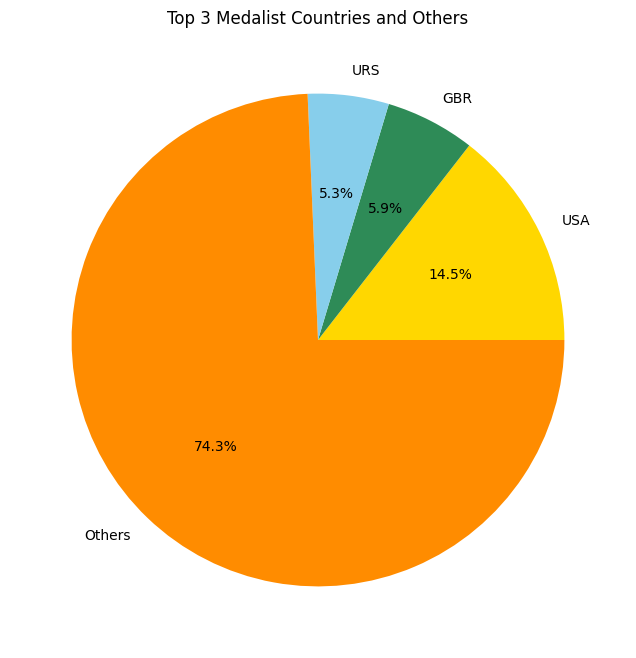

In [131]:
# Group by NOC, Team and Year and count the number of medals and sort it in descending order
medals_top_3 = medals.groupby(['NOC']).size().reset_index(name='Medals').sort_values(by='Medals', ascending=False)

# Top 3 countries
top_3 = medals_top_3.head(3)

# Sum the rest of the rows
other_rows = medals_top_3.iloc[3:]['Medals'].sum()

# Create a DataFrame for 'Others'
others = pd.DataFrame({'NOC': ['Others'], 'Medals': [other_rows]})

# Concat the dataframe
data = pd.concat([top_3, others], axis=0, ignore_index=True)

# Define the colors for the pie chart
colors = ['gold', '#2E8B57', '#87CEEB', '#FF8C00']

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(data['Medals'], labels=data['NOC'], autopct='%1.1f%%', colors=colors)
plt.title('Top 3 Medalist Countries and Others')
plt.show()

# Dominance of the Top 3


*   The United States (USA) leads with 14.5% of total medals, reinforcing its
position as the top nation in Olympic achievements. The Soviet Union (USSR) follows with 5.9%, and Great Britain (GBR) holds 5.3%. These figures underscore the historical influence of the USSR during the Cold War, along with the recent Olympic successes of the USA and GBR.



# Significant Share by Other Nations


*   The "Others" category, which includes all countries outside the top three, makes up 74.3% of the total medals. This distribution highlights the extensive participation and competitiveness of the Olympics, as numerous nations contribute to the overall medal count.




# Historical Context


*   The USSR's significant share reflects its dominance in the mid-20th century, when it was a global superpower in Olympic sports. The USA’s leading position is a result of its sustained excellence across various sports, while Great Britain's strong performance is especially notable in recent years, such as the 2012 London Olympics, where the home advantage played a key role.



# Global Competitiveness:


*   The large proportion of medals attributed to the "Others" segment emphasizes the Olympics' competitive nature, where, despite a few leading nations, many countries achieve notable success across different events, showcasing the global reach of the Games.



In [132]:
# Count the sport for each year
olympics_sport = olympics.groupby('Year')['Sport'].nunique()

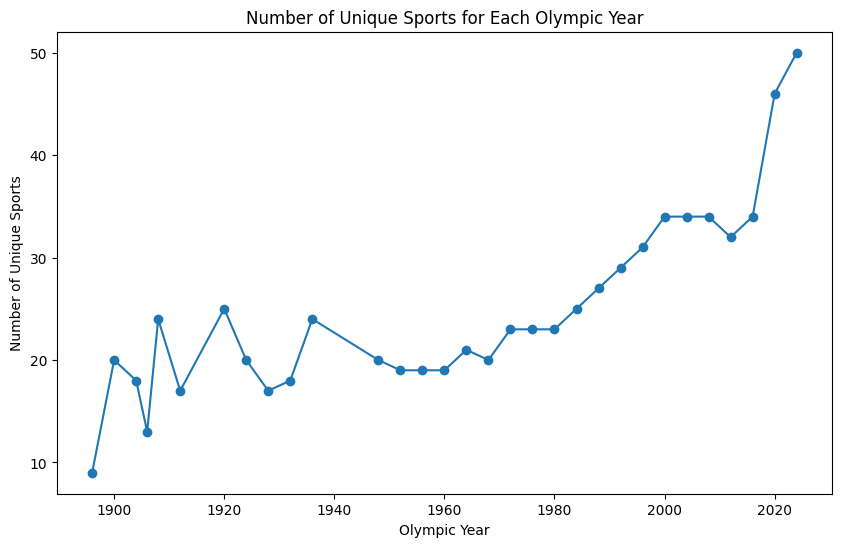

In [137]:
# Plot the line chart of the number of Uniaue sport pet year
plt.figure(figsize=(10, 6))
plt.plot(olympics_sport.index, olympics_sport.values, marker='o')

plt.title('Number of Unique Sports for Each Olympic Year')
plt.xlabel('Olympic Year')
plt.ylabel('Number of Unique Sports')
plt.show()

We can see from the plot that the number of unique sports in the Olympics has generally increased over time, especially after 1980, reflecting an expanding Olympic program and a broader global interest in various athletic disciplines. Prior to 1980, fluctuations in the number of sports were evident, likely due to global events such as the World Wars and changes in Olympic policies. A sharp rise in the number of sports occurred post-2000, driven by the International Olympic Committee's efforts to modernize the Games, promote inclusivity, and appeal to younger audiences. However, some periods have seen plateaus or slight declines, possibly due to the temporary removal or consolidation of events.

In [140]:
olympics.groupby(['Year', 'Sport'])['player_id'].nunique().reset_index(name='Number_of_Athletes').sort_values(by='Number_of_Athletes', ascending=False).head(10)

,Year,Sport,Number_of_Athletes
639,2016,Athletics,2508
505,2000,Athletics,2468
234,1952,Gymnastics,2391
474,1996,Athletics,2386
676,2020,Athletics,2318
607,2012,Athletics,2278
573,2008,Athletics,2244
539,2004,Athletics,2175
418,1988,Athletics,2062
445,1992,Athletics,2054


In [139]:
# Count the number of athletes competing in each sport across different years
olympics_athlete = olympics.groupby(['Year', 'Sport'])['player_id'].nunique().reset_index(name='Number_of_Athletes')

# Create the interactive line chart
fig = px.line(olympics_athlete,
              x='Year',
              y='Number_of_Athletes',
              color='Sport',
              title='Popularity of Different Sports Over Time',
              labels={'Number_of_Athletes': 'Number of Athletes'})

# Update the layout for better visualization
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Athletes',
                  legend_title_text='Sport')

fig.show()


# Fluctuations in Popularity


*   Certain sports experience sharp peaks at specific points in time, reflecting brief periods of heightened popularity, while others show steady growth or consistency. For instance, athletics had a notable peak between 1940 and 1950, followed by a decline.



# Growth in Recent Decades


*   There has been a noticeable increase in athlete participation in several sports post-1980, likely driven by the inclusion of new sports and the expansion of the Olympic program to accommodate a more diverse range of events.




# Consistent Popularity


*   Some sports maintain steady participation levels over time, likely due to their traditional presence in the Olympics and their sustained global appeal.




# Emerging Sports:


*   Sports such as Breaking and Surfing display flat lines before 2020, indicating their recent introduction to the Olympic Games and the growing inclusion of non-traditional sports.




# Variation in Athlete Participation


*   Some sports show consistently high participation, represented by thicker, taller lines, while others see lower levels of athlete involvement, indicated by smaller lines over time.




# Chart Enhancements

*   The chart could benefit from using thicker or varied line styles (such as dashed or dotted lines) to distinguish overlapping lines, especially for sports with lower participation. A more contrasting color palette would also improve clarity. Additionally, marking significant global events, like the World Wars or changes in Olympic regulations, could help contextualize fluctuations in participation. Grouping sports by category (team, individual, water sports) could also provide more insightful trends regarding the growth of specific types of sports.

